In [ ]:
#%%

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#%%

# Gerando dados simulados para a localização de usuários
n_users = 20
np.random.seed(11) ## NAO TIRAR A SEED PELO AMOR DE DEUS
#👆👆👆👆👆👆👆
x_users = np.random.uniform(0, 80, n_users)  # Coordenada X dos usuários
y_users = np.random.uniform(0, 80, n_users)  # Coordenada Y dos usuários
user_locations = np.array(list(zip(x_users, y_users)))
user_ids = [f'Ue{i}' for i in range(n_users)]
user_positions_df = pd.DataFrame(user_locations, columns=['Posição X', 'Posição Y'])
user_positions_df['ID'] = user_ids
user_positions_df = user_positions_df[['ID', 'Posição X', 'Posição Y']]
user_positions_df.to_csv('user_positions.csv', index=False)

#definindo as posições iniciais das antenas
antenna_positions_before = np.array([[10, 10], [10, 90], [90, 10], [90, 90]])
# Número de ante    nas (clusters desejados)
n_antennas = 4
# Aplicando k-means para encontrar os clusters
kmeans = KMeans(n_clusters=n_antennas, random_state=42)
kmeans.fit(user_locations)

# Coordenadas dos centros das antenas (clusters)
antenna_positions_after = kmeans.cluster_centers_
labels = kmeans.labels_

print('Posicionamento das antenas antes da otimização:')
for i, pos in enumerate(antenna_positions_before):
    print(f'Antena {i+1}: {pos}')
print('=====================================')
print('Posicionamento otimizado das antenas:')
for i, pos in enumerate(antenna_positions_after):
    print(f'Antena {i+1}: {pos}')

c:\Users\Marcos Hiarley\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Marcos Hiarley\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Posicionamento das antenas antes da otimização:
Antena 1: [10 10]
Antena 2: [10 90]
Antena 3: [90 10]
Antena 4: [90 90]
Posicionamento otimizado das antenas:
Antena 1: [65.67447021 29.72816464]
Antena 2: [ 7.59707833 62.55374612]
Antena 3: [28.83126095 17.89068152]
Antena 4: [53.6962611  60.43986596]


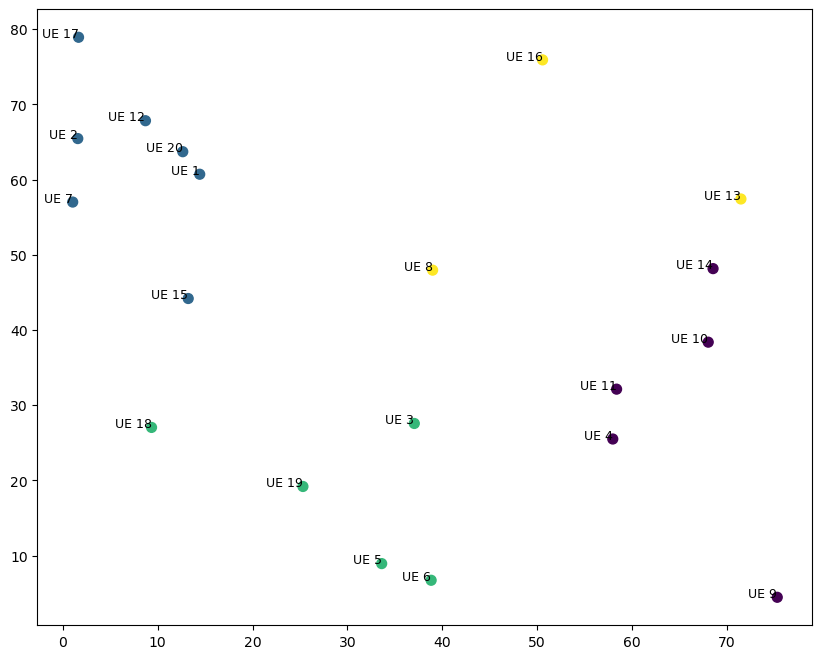

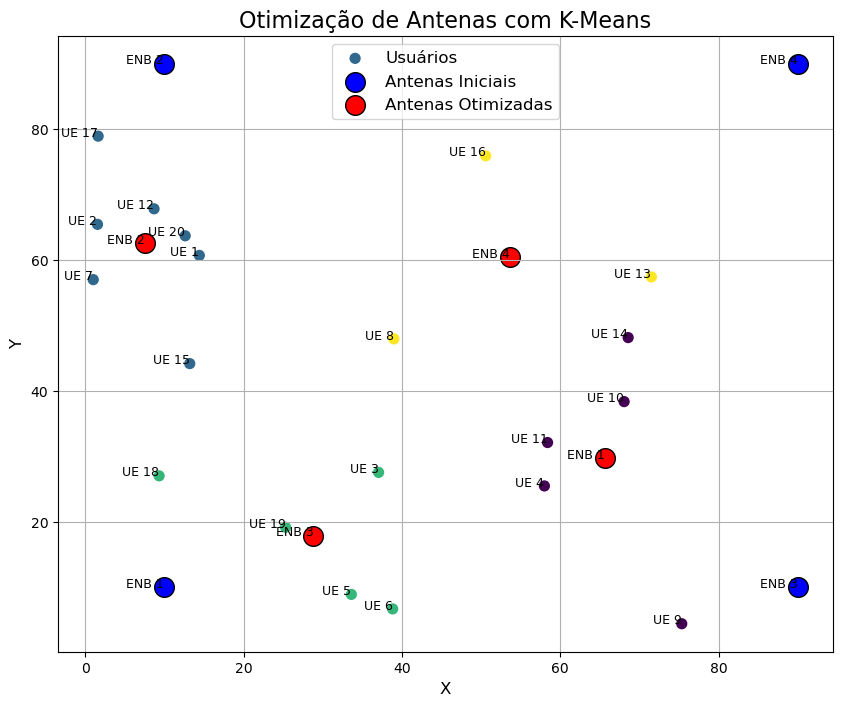

In [ ]:
#%%

plt.figure(figsize=(10, 8))
plt.scatter(x_users, y_users, c=labels, cmap='viridis', s=50, label="Usuários")

# Adicionando o título para cada usuário
for i, (x, y) in enumerate(zip(x_users, y_users)):
    plt.text(x, y, f'UE {i+1}', fontsize=9, ha='right')

# Visualizando os resultados
plt.figure(figsize=(10, 8))
# Plotando os usuários
plt.scatter(x_users, y_users, c=labels, cmap='viridis', s=50, label="Usuários")
# Adicionando o título para cada usuário
for i, (x, y) in enumerate(zip(x_users, y_users)):
    plt.text(x, y, f'UE {i+1}', fontsize=9, ha='right')
# Plotando as antenas iniciais
plt.scatter(antenna_positions_before[:, 0], antenna_positions_before[:, 1], edgecolors='black', c='blue', s=200, marker='o', label="Antenas Iniciais")
# Adicionando o título para cada antena inicial
for i, (x, y) in enumerate(antenna_positions_before):
    plt.text(x, y, f'ENB {i+1}', fontsize=9, ha='right')
# Plotando as antenas otimizadas
plt.scatter(antenna_positions_after[:, 0], antenna_positions_after[:, 1], edgecolors='black', c='red', s=200, marker='o', label="Antenas Otimizadas")
# Adicionando o título para cada antena otimizada
for i, (x, y) in enumerate(antenna_positions_after):
    plt.text(x, y, f'ENB {i+1}', fontsize=9, ha='right')

# Melhorando o visual
plt.title("Otimização de Antenas com K-Means", fontsize=16)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()